The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [3]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [6]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [15]:
df["am"] = df["am"].astype(str)

# Convert the other variables below

In [5]:
df.dtypes

,0
mpg,float64
cyl,int64
disp,float64
hp,int64
drat,float64
wt,float64
qsec,float64
vs,int64
am,object
gear,int64


If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

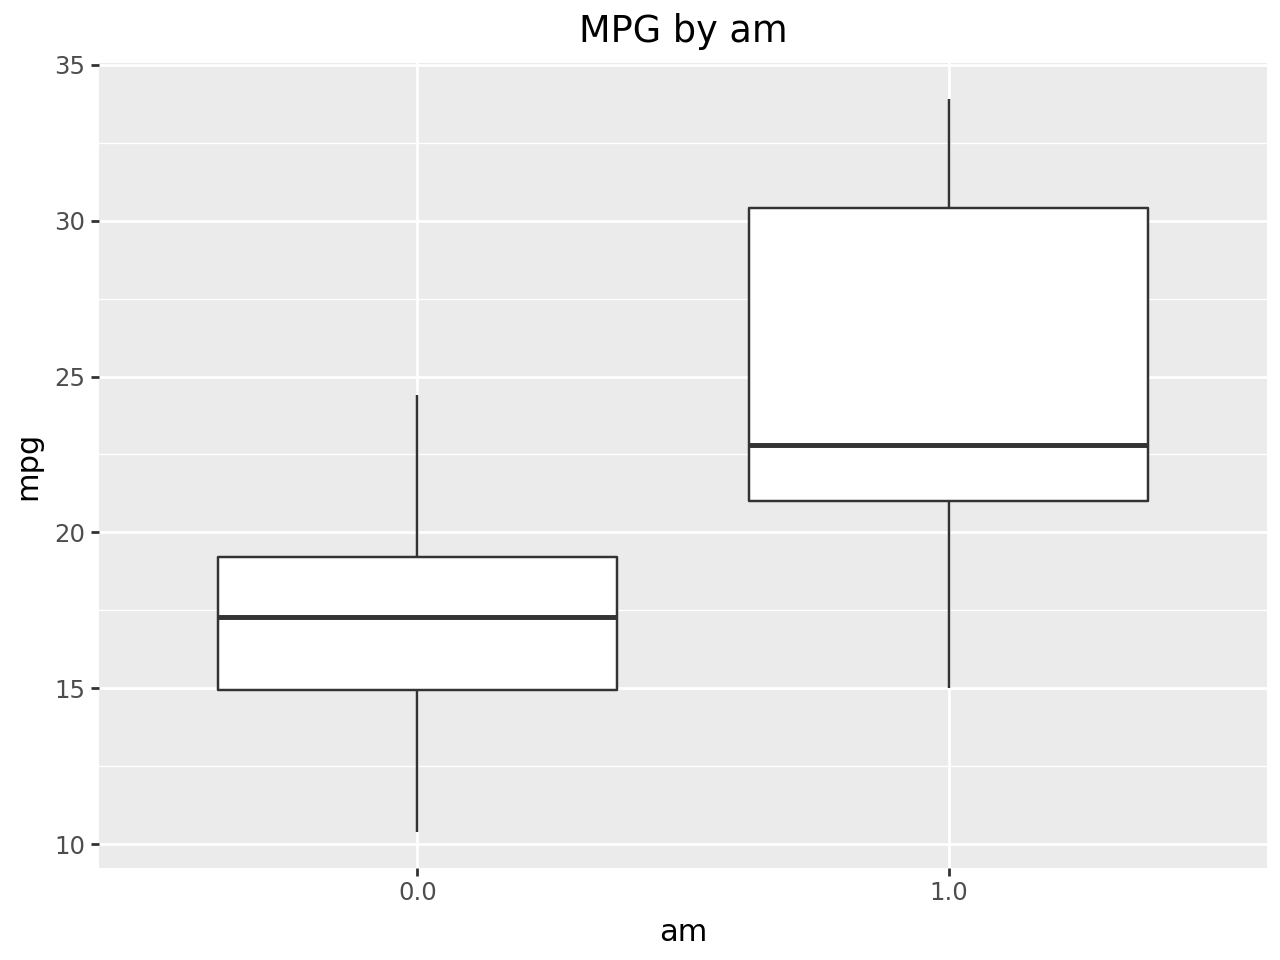

In [16]:
# Create plot for (1) here
from plotnine import ggplot, aes, geom_boxplot, labs

ggplot(df, aes(x = "am", y = "mpg")) + geom_boxplot() + labs(title = "MPG by am")

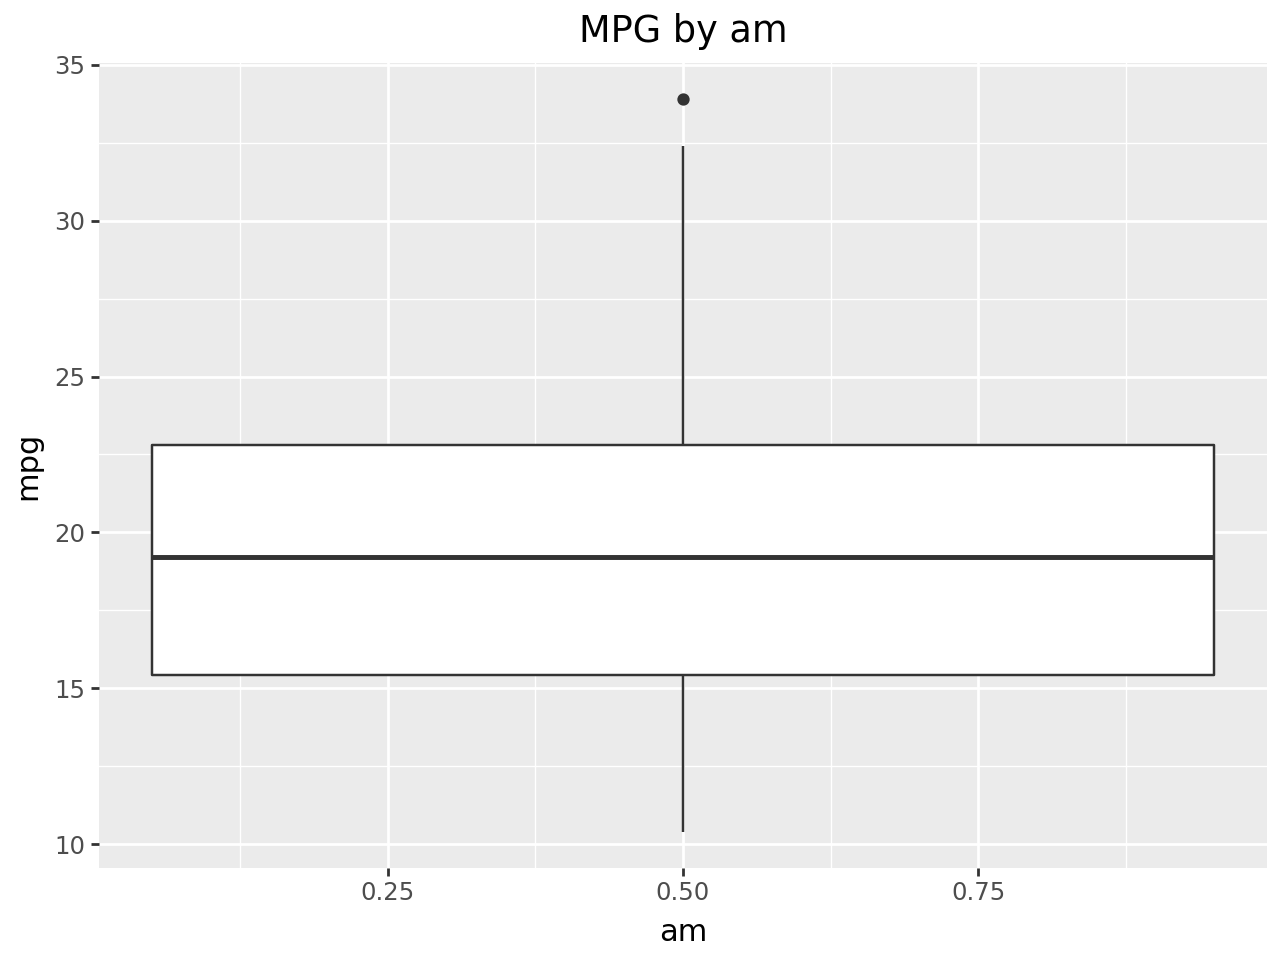

In [17]:
df["am"] = df["am"].astype(float)
ggplot(df, aes(x = "am", y = "mpg")) + geom_boxplot() + labs(title = "MPG by am")

When the am variable is converted back to a float, it is treated as a continuous numeric variable instead of categorical.

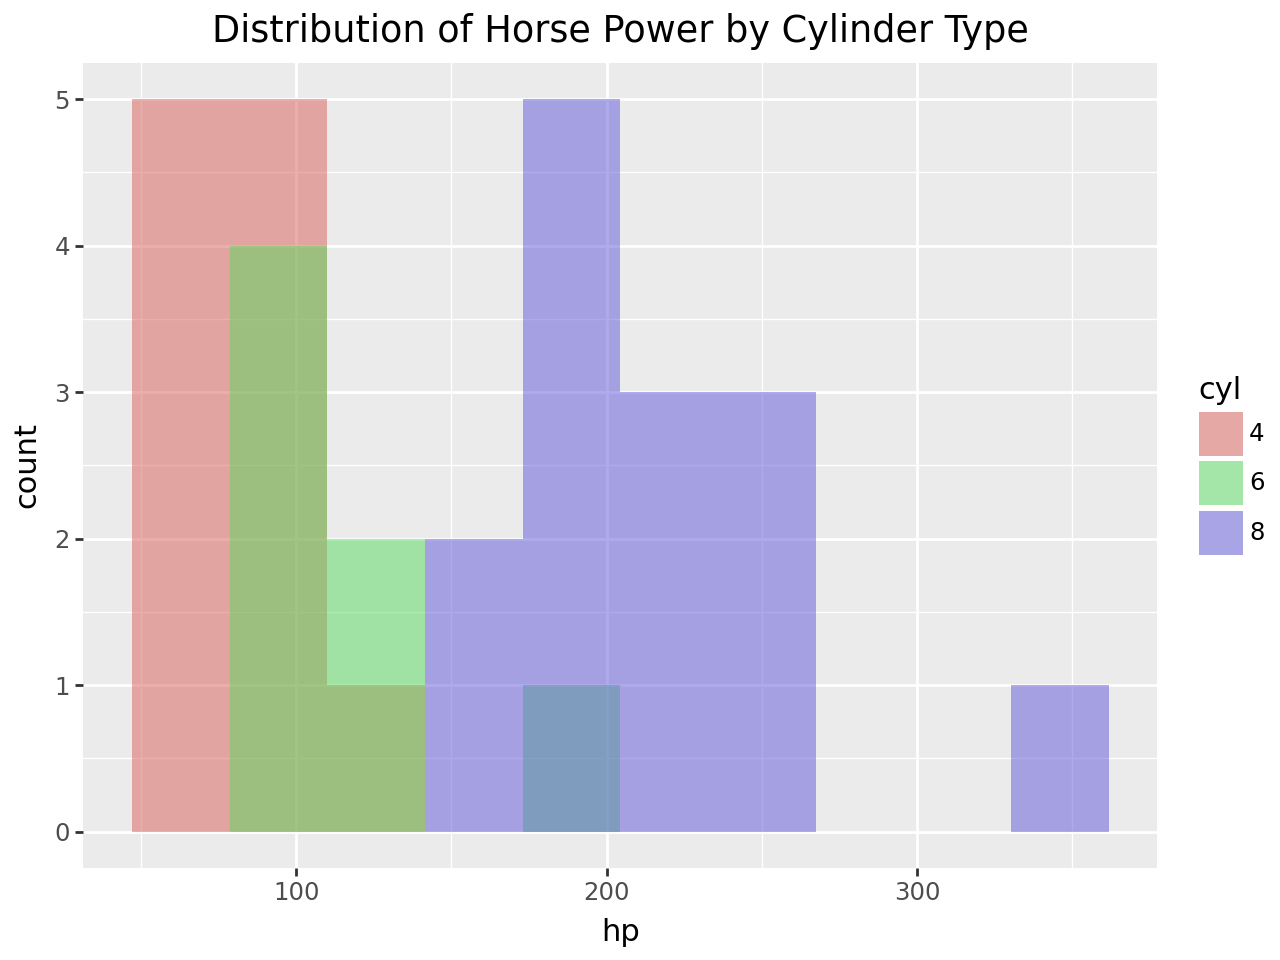

In [23]:
# Create plot for (2) here
from plotnine import geom_histogram
df["cyl"] = df["cyl"].astype(str)
ggplot(df, aes(x = "hp", fill = "cyl")) + geom_histogram(alpha = 0.5, position = "identity", bins = 10) + labs(title = "Distribution of Horse Power by Cylinder Type")

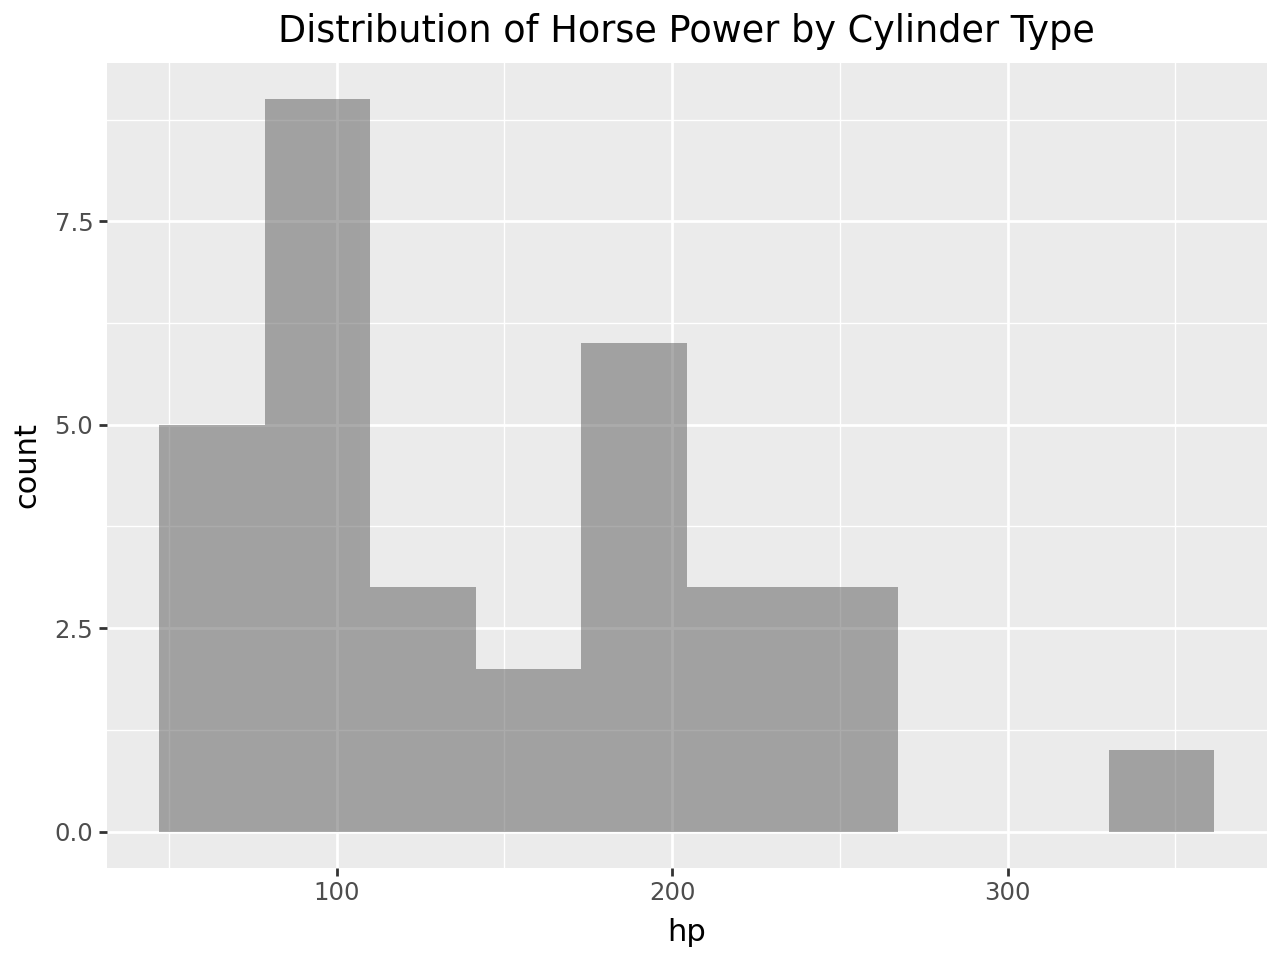

In [24]:

df["cyl"] = df["cyl"].astype(float)
ggplot(df, aes(x = "hp", fill = "cyl")) + geom_histogram(alpha = 0.5, position = "identity", bins = 10) + labs(title = "Distribution of Horse Power by Cylinder Type")

When the cyl variable is converted into a float, There is just 1 category. The histograms are unable to be overlaid.

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '10.4'),
  Text(1, 0, '13.3'),
  Text(2, 0, '14.3'),
  Text(3, 0, '14.7'),
  Text(4, 0, '15.0'),
  Text(5, 0, '15.2'),
  Text(6, 0, '15.5'),
  Text(7, 0, '15.8'),
  Text(8, 0, '16.4'),
  Text(9, 0, '17.3'),
  Text(10, 0, '17.8'),
  Text(11, 0, '18.1'),
  Text(12, 0, '18.7'),
  Text(13, 0, '19.2'),
  Text(14, 0, '19.7'),
  Text(15, 0, '21.0'),
  Text(16, 0, '21.4'),
  Text(17, 0, '21.5'),
  Text(18, 0, '22.8'),
  Text(19, 0, '24.4'),
  Text(20, 0, '26.0'),
  Text(21, 0, '27.3'),
  Text(22, 0, '30.4'),
  Text(23, 0, '32.4'),
  Text(24, 0, '33.9')])

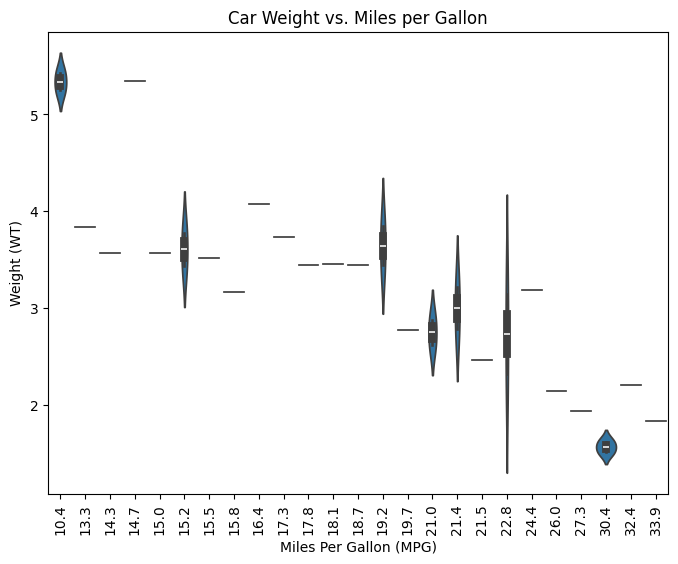

In [58]:
# Create plot with first new geometry here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(8, 6))
sns.violinplot(data = df, x = "mpg", y = "wt")
plt.title("Car Weight vs. Miles per Gallon")
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Weight (WT)')
plt.xticks(rotation = 90)

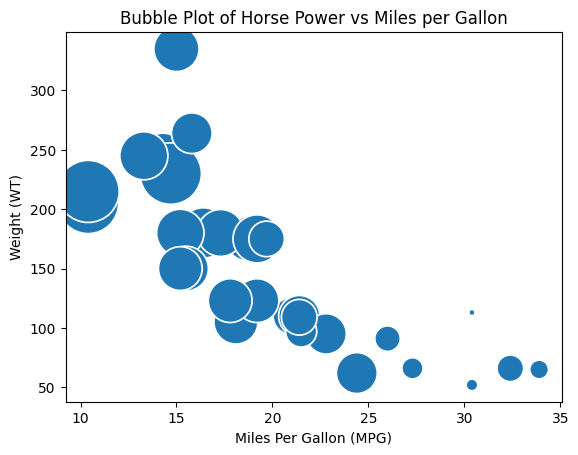

In [57]:
# Create plot with second new geometry here
sns.scatterplot(data=df, x="mpg", y="hp", size="wt", legend=False, sizes=(20, 2000))
plt.title('Bubble Plot of Horse Power vs Miles per Gallon')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Horse Power (HP)')
plt.show()

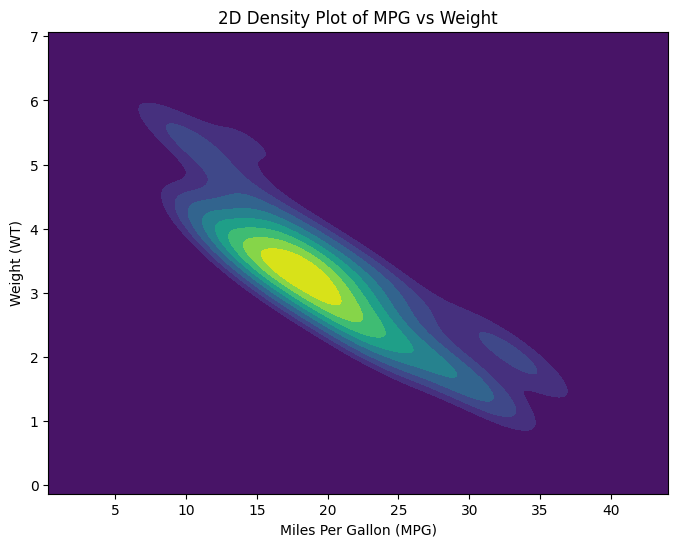

In [43]:
# Create plot with third new geometry here

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(x='mpg', y='wt', data=df, fill=True, cmap='viridis', thresh=0)

plt.title('2D Density Plot of MPG vs Weight')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Weight (WT)')
plt.show()
# from plotnine import geom_density_2d
# ggplot(df, aes(x='mpg', y='wt')) + geom_density_2d() + labs(title='2D Density Plot of MPG vs Weight', x='Miles Per Gallon (MPG)', y='Weight (WT)')
        
